# 01 - Data Exploration

This notebook provides an interactive exploration of the PMU disturbance dataset.

**Contents:**
1. Load and inspect data structure
2. Basic statistics (PMUs, events, date ranges)
3. Data quality assessment
4. Initial visualizations

In [1]:
import sys
sys.path.insert(0, '../src')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from data_loader import load_pmu_disturbance_data, get_section_events, calculate_event_statistics

# Configuration
DATA_PATH = '../../data/PMU_disturbance.xlsx'
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')

## 1. Load Data

In [2]:
# Load PMU and Disturbance data
pmu_df, dist_df = load_pmu_disturbance_data(DATA_PATH)

print(f"PMU Records: {len(pmu_df)}")
print(f"Disturbance Events: {len(dist_df)}")
print(f"\nPMU Columns: {list(pmu_df.columns)}")
print(f"\nDisturbance Columns: {list(dist_df.columns)}")

PMU Records: 533
Disturbance Events: 9369

PMU Columns: ['TermID', 'Terminal', 'Substation', 'Scheme', 'Type', 'Voltage', 'InService', 'OutService', 'Latitude', 'Longitude', 'SectionID', 'PMU Type', 'SPP Bus Name', 'SPP Bus Number', 'Age_Days', 'Age_Years']

Disturbance Columns: ['Timestamp', 'Event_Location', 'Cause', 'Operations', 'SectionID']


In [3]:
# Inspect PMU data
pmu_df.head(10)

,TermID,Terminal,Substation,Scheme,Type,Voltage,InService,OutService,Latitude,Longitude,SectionID,PMU Type,SPP Bus Name,SPP Bus Number,Age_Days,Age_Years
0,0,Arcadia-Northwest,Arcadia,841031336,1,345000,2009-01-01,NaT,35.688685,-97.315375,1483,SEL-421-3,ARCADIA7,514908,6209,16.999316
1,1,Arcadia-Seminole,Arcadia,841031332,1,345000,2009-01-01,NaT,35.688685,-97.315375,442,SEL-421-3,ARCADIA7,514908,6209,16.999316
2,2,Conoco-Continental Empire,Conoco,426331130,1,138000,2009-01-01,NaT,36.686556,-97.083902,903,SEL-421-3,CONORTH4,514753,6209,16.999316
3,3,DRAPER-CIMARRON 2009,Draper,86213136,1,345000,2009-01-01,2010-02-09,35.332302,-97.329193,1330,SEL-421-3,DRAPER 7,514934,6209,16.999316
4,4,FORT SMITH-ANO,Fort Smith,913031531,1,500000,2009-01-01,2010-02-09,35.300000,-94.430310,1577,SEL-421-3,FTSMITH8,515305,6209,16.999316
5,5,MUSK-PECAN L2,Muskogee,312231336,1,345000,2009-01-01,2010-02-09,35.757305,-95.287697,1023,SEL-421-3,MUSKOGE7,515224,6209,16.999316
6,6,Sunnyside-Terry Road,Sunnyside,512731331,1,345000,2009-01-01,NaT,34.185779,-97.241384,1559,SEL-311L-1,SUNNYSD7,515136,6209,16.999316
7,7,WOODRING-CIMARRN,Woodring,NaN,1,345000,2009-01-01,2010-02-09,36.330853,-97.789524,274,SEL-421-3,NaN,0,6209,16.999316
8,8,38th St-Belle Isle/Tulsa,38th St,832231136,1,138000,2009-01-01,NaT,35.509884,-97.564282,416,SEL-421-3,38TH ST4,514846,6209,16.999316
9,9,Belle Isle-38th/Tulsa,Belle Isle,83123136,1,138000,2009-01-01,NaT,35.528437,-97.537398,416,SEL-421-3,BELISLE4,514844,6209,16.999316


In [4]:
# Inspect Disturbance data
dist_df.head(10)

,Timestamp,Event_Location,Cause,Operations,SectionID
0,2022-08-15 08:08:00.000,69KV Etowah 6 to Horseshoe Lake 10,Unknown,2.0,495.0
1,2022-08-14 18:42:50.000,"345KV Seminole Unit #3 383, 393",Other - Boiler tube leak,2.0,774.0
2,2022-08-14 11:00:00.000,69KV Etowah MOS 33 (NO) to Maud Tap 8,Unknown - Clear Weather single trip and reclos...,1.0,497.0
3,2022-08-12 22:09:00.000,"161KV Branch 185, 186 to VBI 182, 183",Unknown - Trip and Reclose. DTF of 6.7 from Br...,4.0,1200.0
4,2022-08-11 18:33:51.000,"345KV Redbud 386, 389 to PSO Riverside 3401A, ...",Failed AC Circuit Equipment - Date/Time: 08/11...,2.0,1710.0
5,2022-08-11 08:59:00.000,69KV Healdton 9 to Ratliff 10,Unknown - Tripped and re-closed,2.0,356.0
6,2022-08-11 08:26:00.000,69KV Etowah MOS 33 (NO) to Maud Tap 8,"Unknown - Maud Tap PCB 8 tripped and re-closed,",1.0,497.0
7,2022-08-09 18:13:55.000,"345KV Sooner 312, 382 to Spring Creek 381, 382",Lightning - weather in area per Spring Creek. ...,4.0,562.0
8,2022-08-08 17:57:00.000,69KV Maud Tap 10 to Park Lane 7,Lightning,2.0,1206.0
9,2022-08-08 15:29:37.157,"69KV El Reno 11 to WFEC Dover 552, 652",Lightning - Date/Time: 08/08/2022 15:29:37 Li...,4.0,169.0


## 2. Basic Statistics

In [5]:
# Date range
datetime_col = [c for c in dist_df.columns if 'time' in c.lower() or 'date' in c.lower()][0]
print(f"Date Range: {dist_df[datetime_col].min()} to {dist_df[datetime_col].max()}")

# Events per section
section_col = [c for c in dist_df.columns if 'section' in c.lower()][0]
events_per_section = dist_df.groupby(section_col).size()
print(f"\nEvents per Section:")
print(f"  Mean: {events_per_section.mean():.1f}")
print(f"  Median: {events_per_section.median():.1f}")
print(f"  Max: {events_per_section.max()} (Section {events_per_section.idxmax()})")
print(f"  Min: {events_per_section.min()}")

Date Range: 2009-01-22 17:38:29.200000 to 2022-08-15 08:08:00

Events per Section:
  Mean: 12.0
  Median: 5.0
  Max: 301 (Section 150.0)
  Min: 1


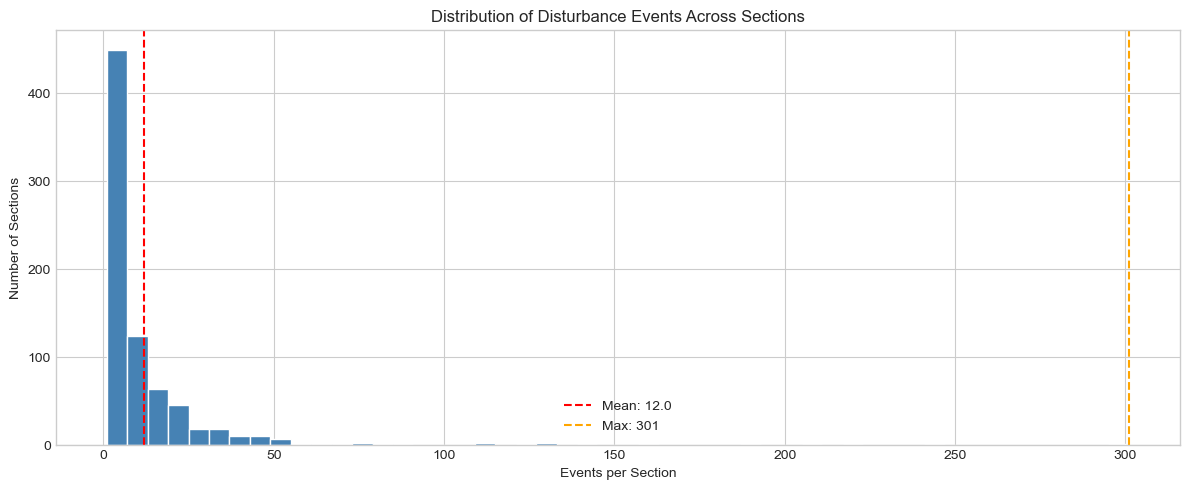

In [6]:
# Distribution of events per section
fig, ax = plt.subplots(figsize=(12, 5))
events_per_section.hist(bins=50, ax=ax, color='steelblue', edgecolor='white')
ax.axvline(events_per_section.mean(), color='red', linestyle='--', label=f'Mean: {events_per_section.mean():.1f}')
ax.axvline(events_per_section.max(), color='orange', linestyle='--', label=f'Max: {events_per_section.max()}')
ax.set_xlabel('Events per Section')
ax.set_ylabel('Number of Sections')
ax.set_title('Distribution of Disturbance Events Across Sections')
ax.legend()
plt.tight_layout()
plt.show()

## 3. Data Quality Assessment

In [7]:
# Missing values
print("Missing Values in PMU Data:")
print(pmu_df.isnull().sum())
print("\nMissing Values in Disturbance Data:")
print(dist_df.isnull().sum())

Missing Values in PMU Data:
TermID              0
Terminal            0
Substation          0
Scheme             62
Type                0
Voltage             0
InService           0
OutService        529
Latitude            0
Longitude           0
SectionID           0
PMU Type            0
SPP Bus Name        8
SPP Bus Number      0
Age_Days            0
Age_Years           0
dtype: int64

Missing Values in Disturbance Data:
Timestamp           0
Event_Location      0
Cause             154
Operations        215
SectionID         186
dtype: int64


In [8]:
# Data types
print("PMU Data Types:")
print(pmu_df.dtypes)
print("\nDisturbance Data Types:")
print(dist_df.dtypes)

PMU Data Types:
TermID                     int64
Terminal                  object
Substation                object
Scheme                    object
Type                       int64
Voltage                    int64
InService         datetime64[ns]
OutService        datetime64[ns]
Latitude                 float64
Longitude                float64
SectionID                  int64
PMU Type                  object
SPP Bus Name              object
SPP Bus Number             int64
Age_Days                   int64
Age_Years                float64
dtype: object

Disturbance Data Types:
Timestamp         datetime64[ns]
Event_Location            object
Cause                     object
Operations               float64
SectionID                float64
dtype: object


## 4. Initial Visualizations

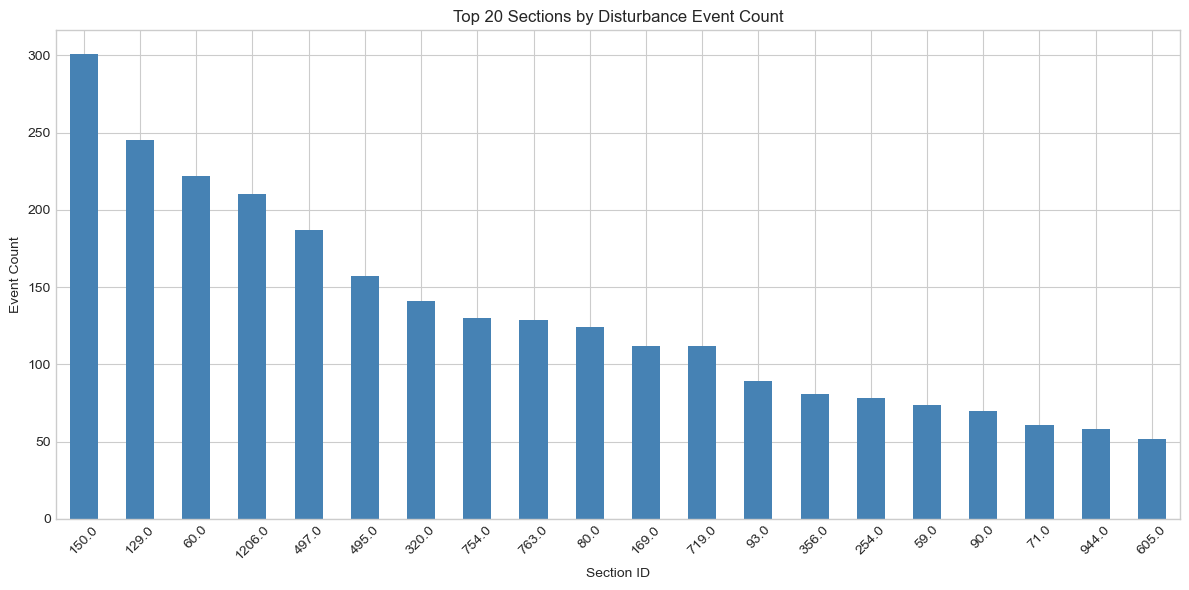

In [9]:
# Top 20 sections by event count
top_sections = events_per_section.nlargest(20)

fig, ax = plt.subplots(figsize=(12, 6))
top_sections.plot(kind='bar', ax=ax, color='steelblue')
ax.set_xlabel('Section ID')
ax.set_ylabel('Event Count')
ax.set_title('Top 20 Sections by Disturbance Event Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/6k/0zwfw8dn7jvd5l4rhw4qjpcr0000gn/T/ipykernel_54270/3334046161.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  daily_events = dist_df.set_index(datetime_col).resample('M').size()


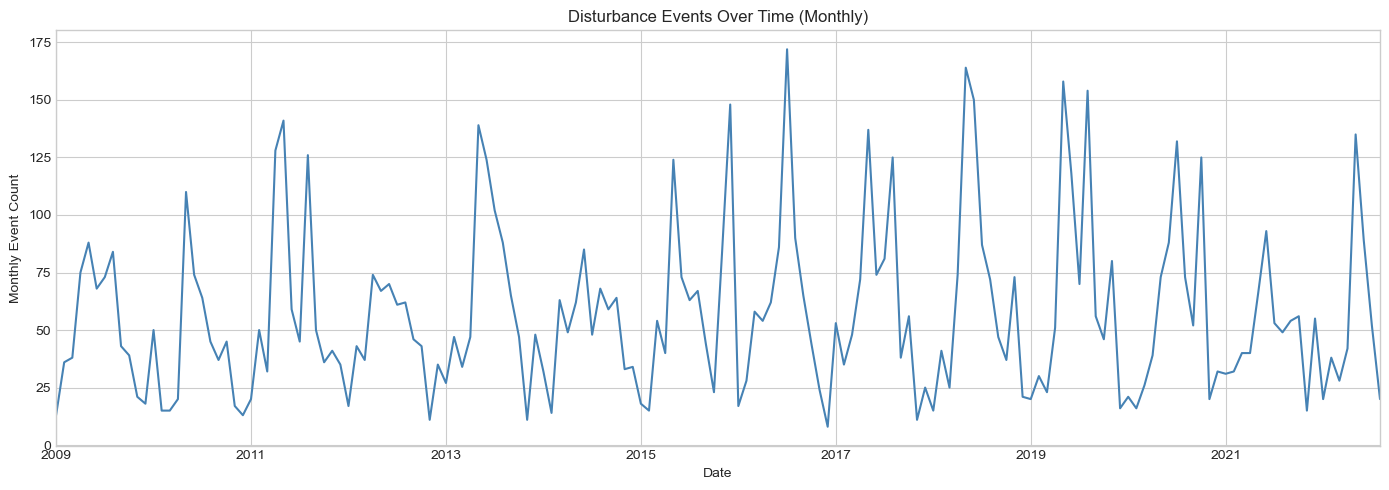

In [10]:
# Events over time
daily_events = dist_df.set_index(datetime_col).resample('M').size()

fig, ax = plt.subplots(figsize=(14, 5))
daily_events.plot(ax=ax, color='steelblue')
ax.set_xlabel('Date')
ax.set_ylabel('Monthly Event Count')
ax.set_title('Disturbance Events Over Time (Monthly)')
plt.tight_layout()
plt.show()

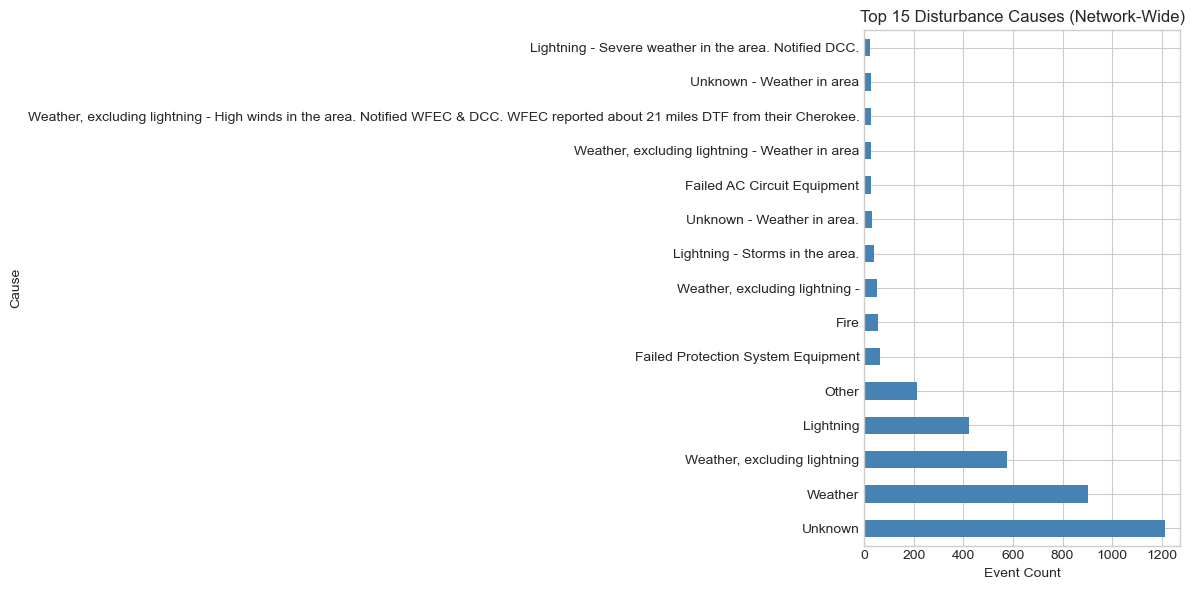

In [11]:
# Cause distribution
cause_col = [c for c in dist_df.columns if 'cause' in c.lower()][0]
cause_counts = dist_df[cause_col].value_counts().head(15)

fig, ax = plt.subplots(figsize=(12, 6))
cause_counts.plot(kind='barh', ax=ax, color='steelblue')
ax.set_xlabel('Event Count')
ax.set_ylabel('Cause')
ax.set_title('Top 15 Disturbance Causes (Network-Wide)')
plt.tight_layout()
plt.show()

## Summary

Key findings from data exploration:
- **533 PMU sections** in the network
- **9,369 disturbance events** recorded
- Highly skewed distribution - most sections have few events, but some have hundreds
- Section 150 has the most events (301)
- Data quality appears good with minimal missing values